# Setup

# Large margin classification

<Figure size 864x194.4 with 0 Axes>

(0, 2)

Text(0.5,0,'petal length')

Text(0,0.5,'petal width')

[0, 5.5, 0, 2]

Text(0.5,0,'petal length')

[0, 5.5, 0, 2]

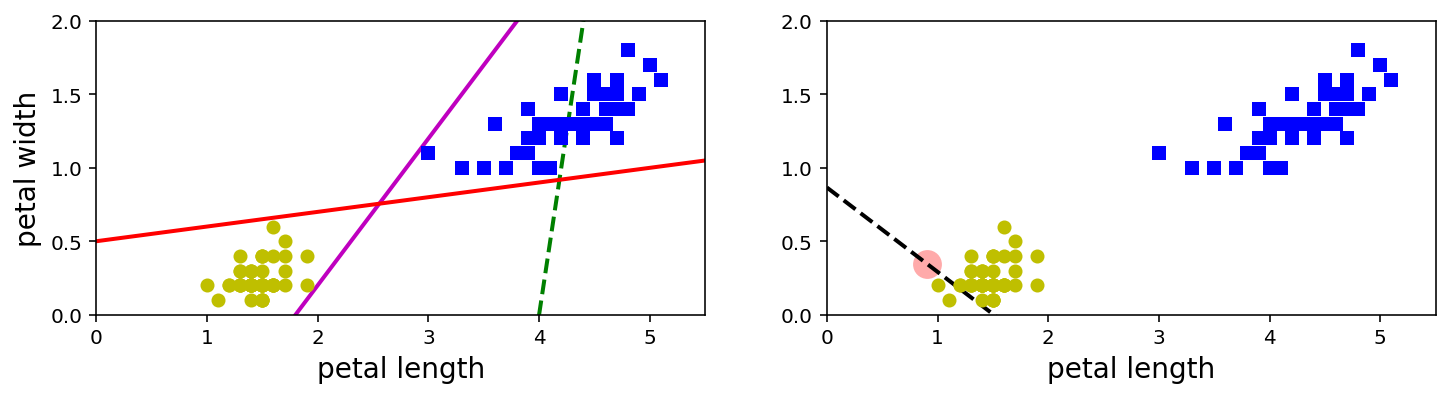

In [91]:
x0 = np.linspace(0, 5.5, 200)
pr_1 = 5.*x0 - 20.
pr_2 = x0 - 1.8
pr_3 = 0.1*x0 + 0.5

plt.figure(figsize=(12, 2.7))
plt.subplot(121)
plt.ylim([0,2]);
plt.plot(x0, pr_1, 'g--', linewidth=2)
plt.plot(x0, pr_2, 'm-', linewidth=2)
plt.plot(x0, pr_3, 'r-', linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="iris_ver")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="iris_ver")
plt.xlabel("petal length", fontsize=14)
plt.ylabel("petal width", fontsize=14)
plt.axis([0,5.5,0,2])


def plot_svc_decision_boundary(svc_clf, xmin, xmax):
    w = svc_clf.coef_[0]
    b = svc_clf.intercept_[0]
    x0 = np.linspace(xmin, xmax, 200)
    # at decision boundary x0 w0 + x1 w1 + b = 0
    # x1 = - w0/w1 x0 - b/w1
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svc_clf.support_vectors_
    plt.scatter(svs[:,0], svs[:,1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, 'k-', linewidth=2)
    plt.plot(x0, gutter_up, 'k--', linewidth=2)
    plt.plot(x0, gutter_down, 'k--', linewidth=2)
    

plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:,1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:,1][y==0], "yo")
plt.xlabel("petal length", fontsize=14)
plt.axis([0,5.5,0,2])
plt.show()

# Sensitive to feature scales

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

<Figure size 864x230.4 with 0 Axes>

Text(0.5,0,'$x_0$')

Text(0,0.5,'$x_1$')

Text(0.5,1,'unsacled')

[0, 6, 0, 90]

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Text(0.5,0,'$x_0$')

Text(0,0.5,'$x_1$')

Text(0.5,1,'Scaled')

[-2, 2, -2, 2]

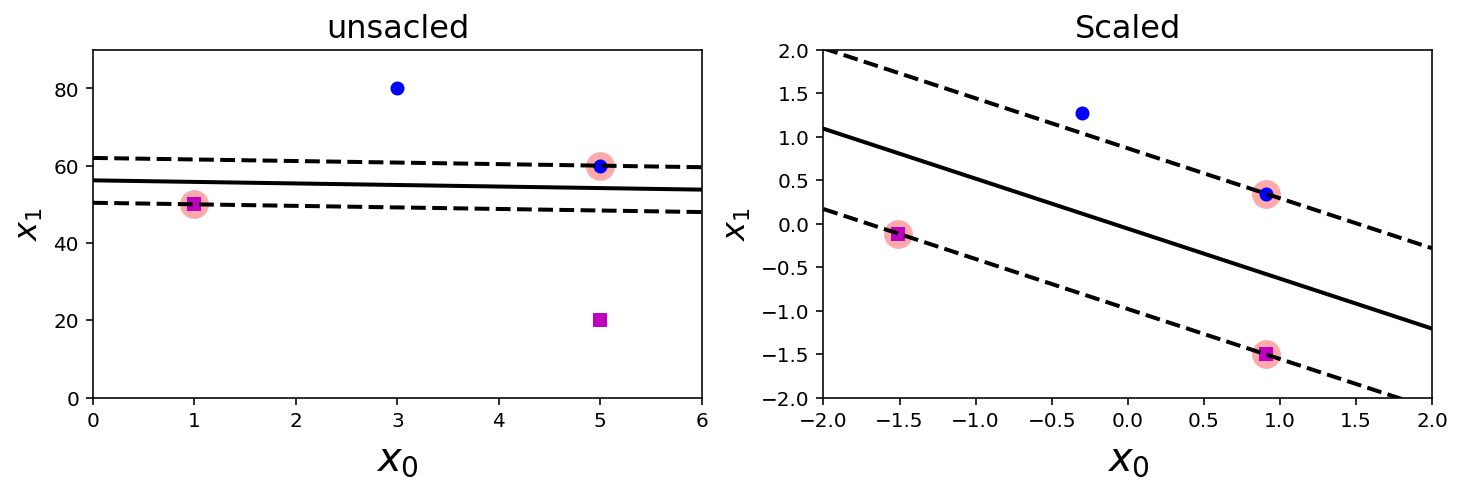

In [90]:
Xs = np.array([[1,50],[5,20], [3,80], [5,60]]).astype(np.float64)
ys = np.array([0,0,1,1])
svm_clf = SVC(kernel='linear', C=100)
svm_clf.fit(Xs, ys)
#print(ys==0)
#print(Xs[:,:][ys==0])
plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(Xs[:,0][ys==1], Xs[:,1][ys==1], "bo")
plt.plot(Xs[:,0][ys==0], Xs[:,1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel('$x_0$', fontsize=20)
plt.ylabel('$x_1$', fontsize=16)
plt.title("unsacled", fontsize=16)
plt.axis([0,6,0, 90])


##scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(Xs)
svm_clf.fit(x_scaled, ys)
#print(x_scaled)
plt.subplot(122)
plt.plot(x_scaled[:,0][ys==1], x_scaled[:,1][ys==1], "bo")
plt.plot(x_scaled[:,0][ys==0], x_scaled[:,1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel('$x_0$', fontsize=20)
plt.ylabel('$x_1$', fontsize=16)
plt.title("Scaled", fontsize=16)
plt.axis([-2,2,-2,2])

plt.show()

$f(x;\mu, \sigma) = \frac{1}{\sqrt{2\pi} \sigma} e^{\frac{1}{2\sigma^2}(x-\mu)^2}$

# Sensitivity to outliers

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

<Figure size 864x194.4 with 0 Axes>

Text(2.5,1.7,'Outlier')

[0, 5.5, 0, 2]

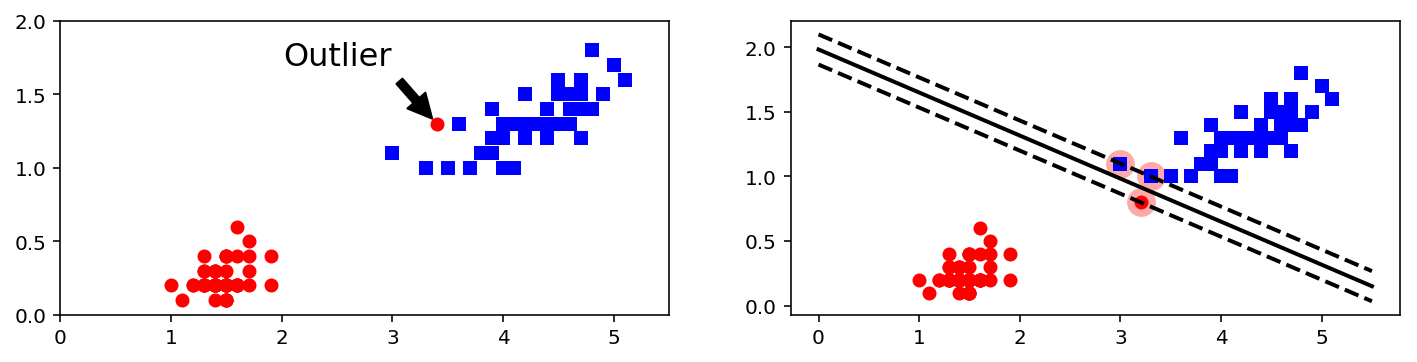

In [125]:
X_outliers = np.array([[3.4,1.3], [3.2,0.8]])
y_outliers = np.array([0,0])

Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel='linear', C=100)#C=10**9)
svm_clf2.fit(Xo2, yo2)

plt.figure(figsize=(12, 2.7))
plt.subplot(121)
plt.plot(Xo1[:,0][yo1==1], Xo1[:,1][yo1==1], "bs")
plt.plot(Xo1[:,0][yo1==0], Xo1[:,1][yo1==0], "ro")
plt.annotate("Outlier",
             xy = (X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )

#plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plt.plot(Xo2[:,0][yo2==1], Xo2[:,1][yo2==1], "bs")
plt.plot(Xo2[:,0][yo2==0], Xo2[:,1][yo2==0], "ro")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)


plt.show()


# Non-Linear classification

(9, 1)


<Figure size 792x288 with 0 Axes>

[-4.5, 4.5, -0.2, 0.2]

[-4.5, 4.5, -1, 17]

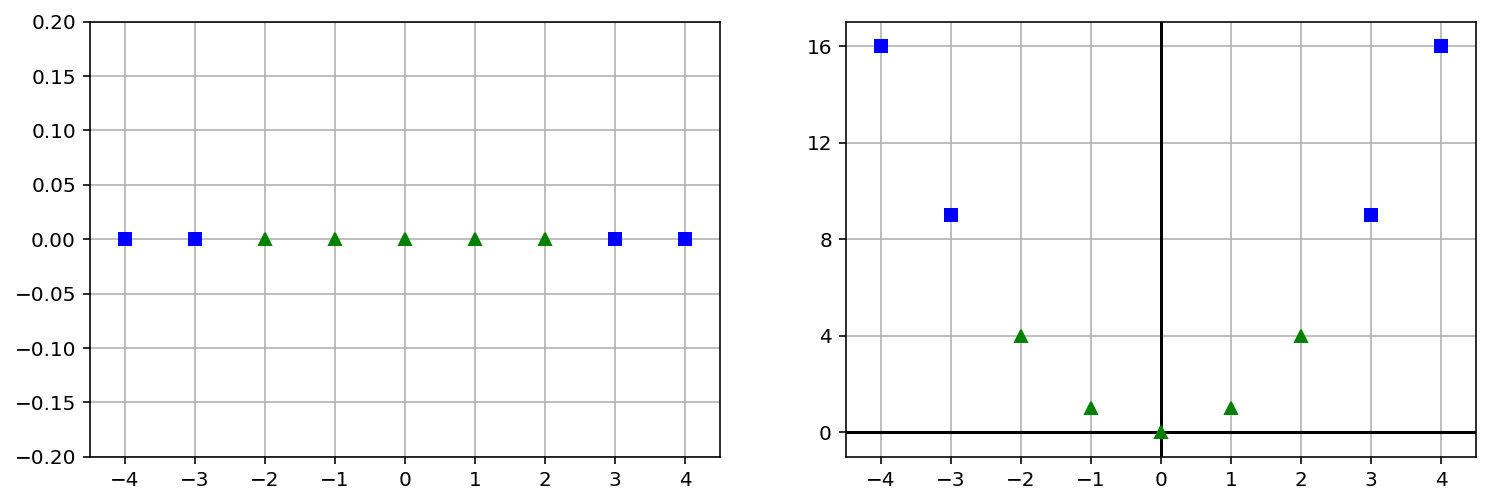

In [173]:
from pprint import pprint
X1D = np.linspace(-4,4,9).reshape(-1,1) #-1 represent upspecified
X2D = np.c_[X1D, X1D**2]
print(X1D.shape) #np.reshape
#pprint(help(np.c_)
y = np.array([0,0,1,1,1,1,1,0,0])

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.grid(True, which='both')
#plt.axhline(y=0, color='k')
#plt.axvline(x=0, color='k')
plt.plot(X1D[:,0][y==0], np.zeros(4), 'bs')
plt.plot(X1D[:,0][y==1], np.zeros(5), 'g^')
#plt.gca().get_yaxis().set_ticks([])
plt.axis([-4.5,4.5, -0.2,0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
#print(X2D[:,0][y==0], X2D[:,1][y==0])
plt.plot(X2D[:,0][y==0], X2D[:,1][y==0], 'bs')
plt.plot(X2D[:,0][y==1], X2D[:,1][y==1], 'g^')
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
#plt.gca().get_yaxis().set_ticks([])
plt.axis([-4.5,4.5, -1,17])
plt.subplots_adjust(right=1)
plt.show()

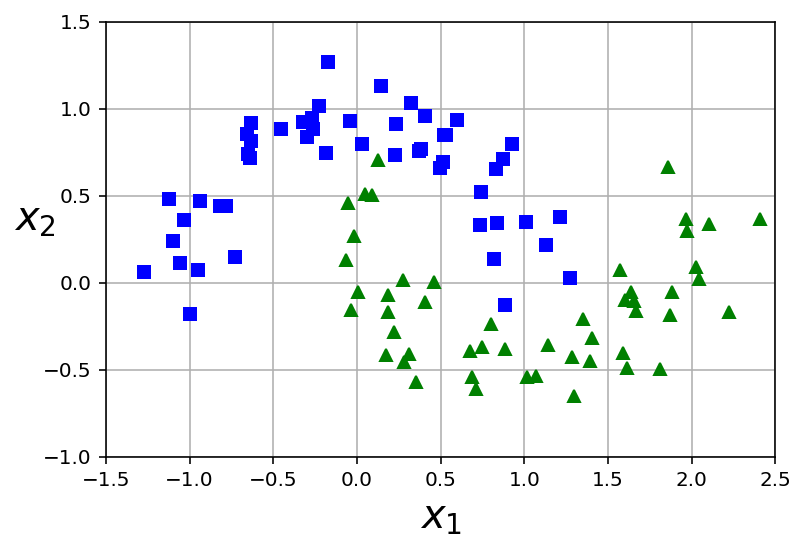

In [182]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:,0][y==0], X[:,1][y==0], 'bs')
    plt.plot(X[:,0][y==1], X[:,1][y==1], 'g^')
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    
    

plot_dataset(X, y, [-1.5,2.5,-1,1.5])
plt.show()

In [185]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC
polynomial_svm_clf = Pipeline([
                ('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf',LinearSVC(C=10, loss='hinge', random_state=42))])

polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

[[-1.5        -1.        ]
 [-1.45959596 -1.        ]
 [-1.41919192 -1.        ]
 ...
 [ 2.41919192  1.5       ]
 [ 2.45959596  1.5       ]
 [ 2.5         1.5       ]] (10000, 2) 


 [[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]] (100, 100) 


 [[-20.14492359 -18.66790604 -17.23710379 ...  43.19015103  44.45511016
   45.76282952]
 [-20.17641511 -18.7161729  -17.30213213 ...  41.59596488  42.84549268
   44.13779458]
 [-20.18948176 -18.74570089 -17.34810762 ...  40.05066061  41.28507109
   42.56226952]
 ...
 [-43.86883872 -42.55709209 -41.29021675 ...   9.69271237  10.92277049
   12.19693286]
 [-45.47486856 -44.14944026 -42.86886938 ...   9.47831822  10.72340204
   12.01260396]
 [-47.13251002 -45.79308604 -44.49850564 ...   9.24276948  10.50319299
   11.80774845]] (100, 100)


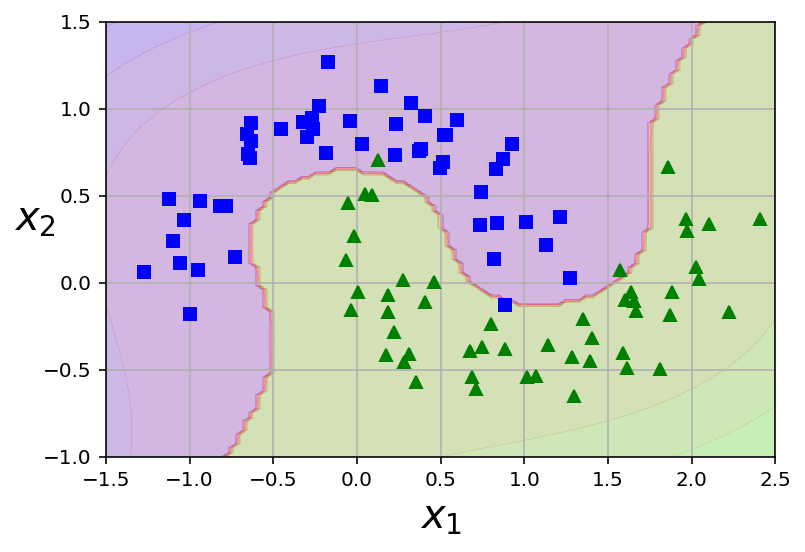

In [215]:
def plot_prediction(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    print(X,X.shape,'\n\n\n',y_pred, y_pred.shape,'\n\n\n', y_decision, y_decision.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.cm
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_prediction(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5,2.5,-1, 1.5])

In [73]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


from pydataset import data
quakes = data('quakes')
quakes.head()
quakes.tail()

ImportError: No module named 'pydataset'

In [204]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
#help(Pipeline)
df = pd.DataFrame(np.arange(36).reshape(9,4))
df.T
%whos ndarray

Help on class Pipeline in module sklearn.pipeline:

class Pipeline(sklearn.utils.metaestimators._BaseComposition)
 |  Pipeline of transforms with a final estimator.
 |  
 |  Sequentially apply a list of transforms and a final estimator.
 |  Intermediate steps of the pipeline must be 'transforms', that is, they
 |  must implement fit and transform methods.
 |  The final estimator only needs to implement fit.
 |  The transformers in the pipeline can be cached using ``memory`` argument.
 |  
 |  The purpose of the pipeline is to assemble several steps that can be
 |  cross-validated together while setting different parameters.
 |  For this, it enables setting parameters of the various steps using their
 |  names and the parameter name separated by a '__', as in the example below.
 |  A step's estimator may be replaced entirely by setting the parameter
 |  with its name to another estimator, or a transformer removed by setting
 |  to None.
 |  
 |  Read more in the :ref:`User Guide <pipeli

,0,1,2,3,4,5,6,7,8
0,0,4,8,12,16,20,24,28,32
1,1,5,9,13,17,21,25,29,33
2,2,6,10,14,18,22,26,30,34
3,3,7,11,15,19,23,27,31,35


Variable               Type       Data/Info
-------------------------------------------
X                      ndarray    100x2: 200 elems, type `float64`, 1600 bytes
X1D                    ndarray    9x1: 9 elems, type `float64`, 72 bytes
X2D                    ndarray    9x2: 18 elems, type `float64`, 144 bytes
X_outliers             ndarray    2x2: 4 elems, type `float64`, 32 bytes
Xo1                    ndarray    101x2: 202 elems, type `float64`, 1616 bytes
Xo2                    ndarray    101x2: 202 elems, type `float64`, 1616 bytes
Xs                     ndarray    4x2: 8 elems, type `float64`, 64 bytes
pr_1                   ndarray    200: 200 elems, type `float64`, 1600 bytes
pr_2                   ndarray    200: 200 elems, type `float64`, 1600 bytes
pr_3                   ndarray    200: 200 elems, type `float64`, 1600 bytes
setosa_or_versicolor   ndarray    150: 150 elems, type `bool`, 150 bytes
x0                     ndarray    200: 200 elems, type `float64`, 1600 bytes


In [221]:
?str.join